In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet

# Dataset Analysis

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/dr_reddy.csv'

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv(path)
df

,DateTime,Pre Open NIFTY 50,NIFTY 50
0,2025-04-08 09:00:00,22161.60,NaN
1,2025-04-08 09:00:59,22509.45,NaN
2,2025-04-08 09:01:59,22479.65,NaN
3,2025-04-08 09:02:59,22331.85,NaN
4,2025-04-08 09:03:59,22264.30,NaN
...,...,...,...
171,2025-04-08 11:50:49,NaN,22407.70
172,2025-04-08 11:51:49,NaN,22386.40
173,2025-04-08 11:52:49,NaN,22404.55
174,2025-04-08 11:53:49,NaN,22421.90


In [4]:
df.describe()

,Pre Open NIFTY 50,NIFTY 50
count,8.000000,168.000000
mean,22366.981250,22414.251786
std,115.802991,66.019944
min,22161.600000,22286.500000
25%,22314.962500,22379.125000
50%,22375.425000,22404.425000
75%,22448.525000,22454.287500
max,22509.450000,22548.850000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   DateTime           176 non-null    object 
 1   Pre Open NIFTY 50  8 non-null      float64
 2   NIFTY 50           168 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.3+ KB


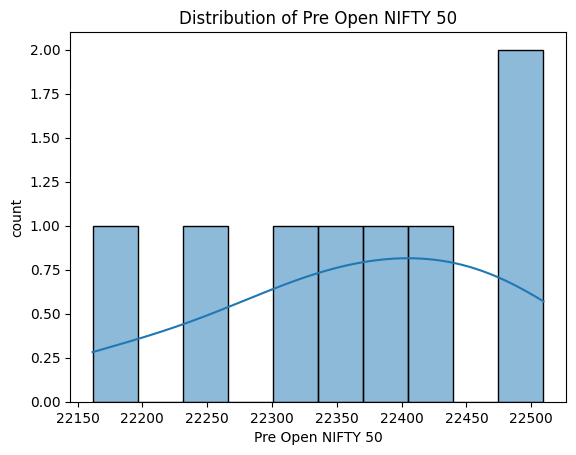

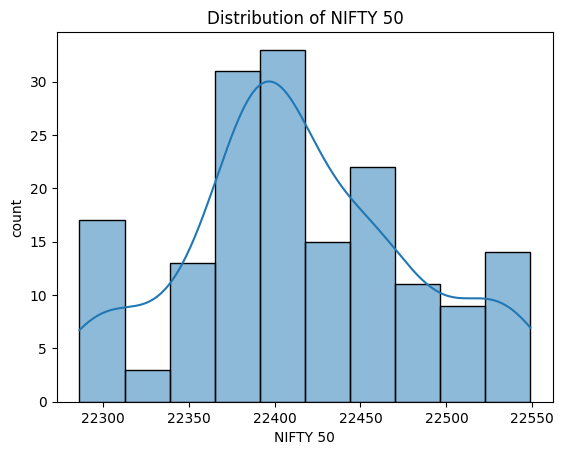

In [6]:
num_cols = df.select_dtypes(include=['int', 'float']).columns
for col in num_cols:
    if df[col].dtype == 'int' or df[col].dtype == 'float':
        sns.histplot(data=df, x=df[col], kde=True, bins=10)
        plt.ylabel('count')
        plt.title(f'Distribution of {col}')
        plt.show()

Index(['DateTime', 'Pre Open NIFTY 50', 'NIFTY 50'], dtype='object')


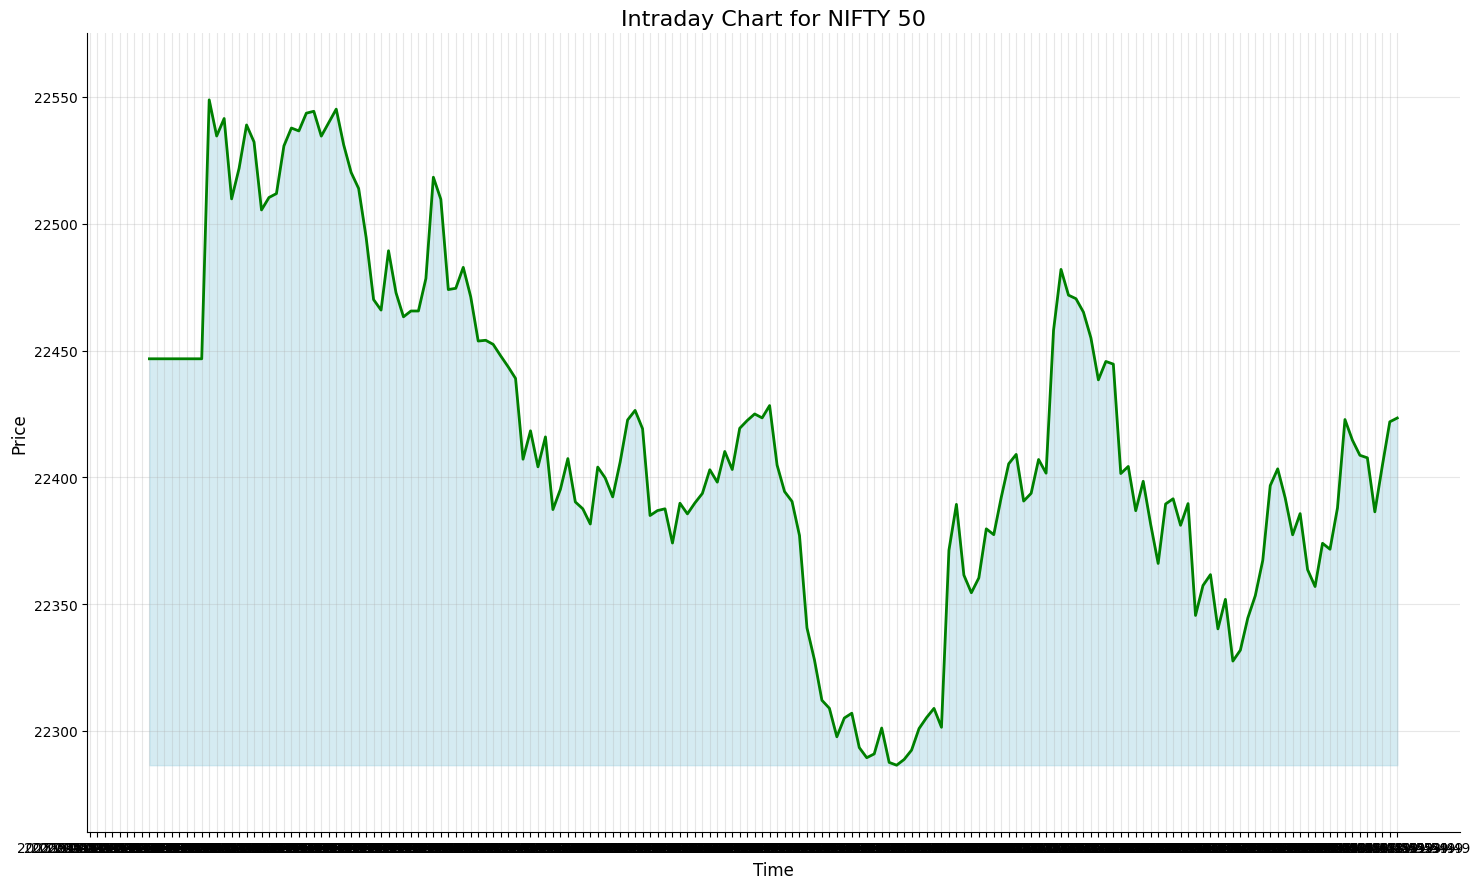

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, check what columns are available in your DataFrame
print(df.columns)

# Assuming your time column might be named differently, like 'Date' or 'Timestamp'
# Replace 'YourTimeColumn' with the actual column name from your DataFrame
time_column = 'DateTime'  # Change this to your actual time column name

# Create the intraday chart
plt.figure(figsize=(15, 9))

# Plot the line
sns.lineplot(data=df, x=time_column, y='NIFTY 50', color='green', linewidth=2)

# Fill area below the line
plt.fill_between(df[time_column], df['NIFTY 50'].min(), df['NIFTY 50'],
                 color='lightblue', alpha=0.5)

# Set the title and labels
plt.title('Intraday Chart for NIFTY 50', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)

# Set y-axis limits to focus on the price range
min_price = df['NIFTY 50'].min()
max_price = df['NIFTY 50'].max()
buffer = (max_price - min_price) * 0.1
plt.ylim(min_price - buffer, max_price + buffer)

# Add grid and remove top and right spines
plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


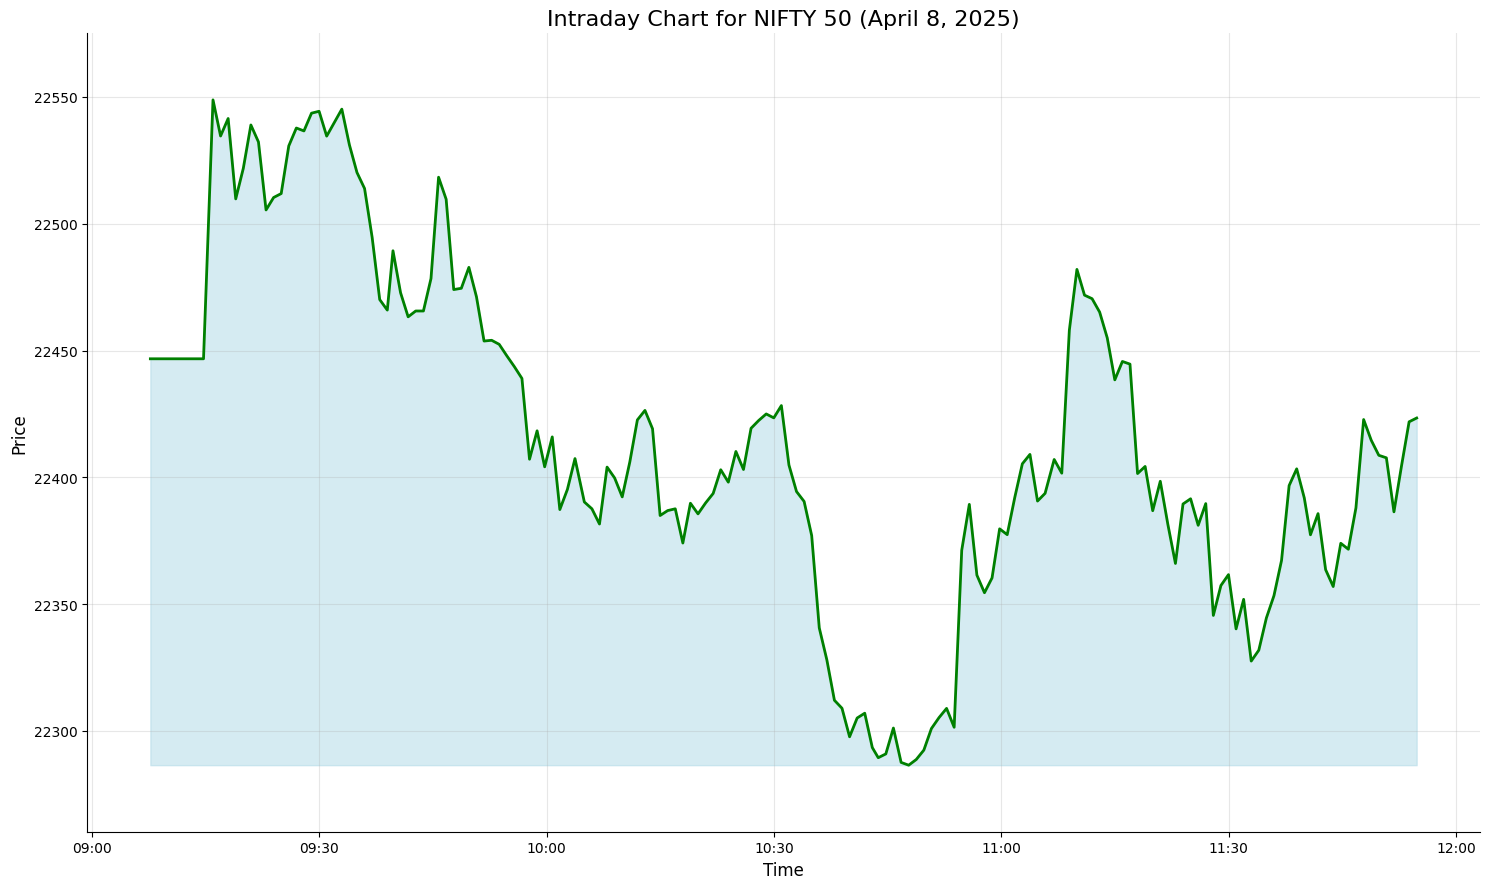

Training set shape: X_train (134, 1), y_train (134,)
Testing set shape: X_test (34, 1), y_test (34,)


<ipython-input-8-312ca75d5ea6>:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour'] = df['DateTime'].dt.hour
<ipython-input-8-312ca75d5ea6>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['minute'] = df['DateTime'].dt.minute
<ipython-input-8-312ca75d5ea6>:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# First, let's clean the data
# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Handle NaN values in NIFTY 50 column
df['NIFTY 50'] = pd.to_numeric(df['NIFTY 50'], errors='coerce')
df = df.dropna(subset=['NIFTY 50'])

# Create the intraday chart
plt.figure(figsize=(15, 9))

# Plot the line
sns.lineplot(data=df, x='DateTime', y='NIFTY 50', color='green', linewidth=2)

# Fill area below the line
plt.fill_between(df['DateTime'], df['NIFTY 50'].min(), df['NIFTY 50'],
                 color='lightblue', alpha=0.5)

# Format x-axis to show only time
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%H:%M'))

# Set the title and labels
plt.title('Intraday Chart for NIFTY 50 (April 8, 2025)', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)

# Set y-axis limits to focus on the price range
min_price = df['NIFTY 50'].min()
max_price = df['NIFTY 50'].max()
buffer = (max_price - min_price) * 0.1
plt.ylim(min_price - buffer, max_price + buffer)

# Add grid and remove top and right spines
plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

# Prepare data for train-test split
# Extract features from DateTime
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['time_value'] = df['hour'] * 60 + df['minute']  # Minutes since midnight

# Create features and target
X = df[['time_value']]
y = df['NIFTY 50']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_test {X_test.shape}, y_test {y_test.shape}")


# Simple RNN

<ipython-input-9-5b4bd5bc0db9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NIFTY 50'] = df['NIFTY 50'].fillna(df['Pre Open NIFTY 50'])
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 346ms/step - loss: 504382848.0000 - val_loss: 502467616.0000
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 503666848.0000 - val_loss: 501368736.0000
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 502453504.0000 - val_loss: 500303424.0000
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 501490720.0000 - val_loss: 499237920.0000
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 500341760.0000 - val_loss: 498171904.0000
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 499180864.0000 - val_loss: 497104128.0000
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 498375104.0000 - val_loss: 496036416.0000
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 497321536.0000 - val_loss: 494967712.0000
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 496052864.0000 - val_loss: 493894144.0000
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 495259264.0000 - val_loss: 492818688.0000
Epoch 11

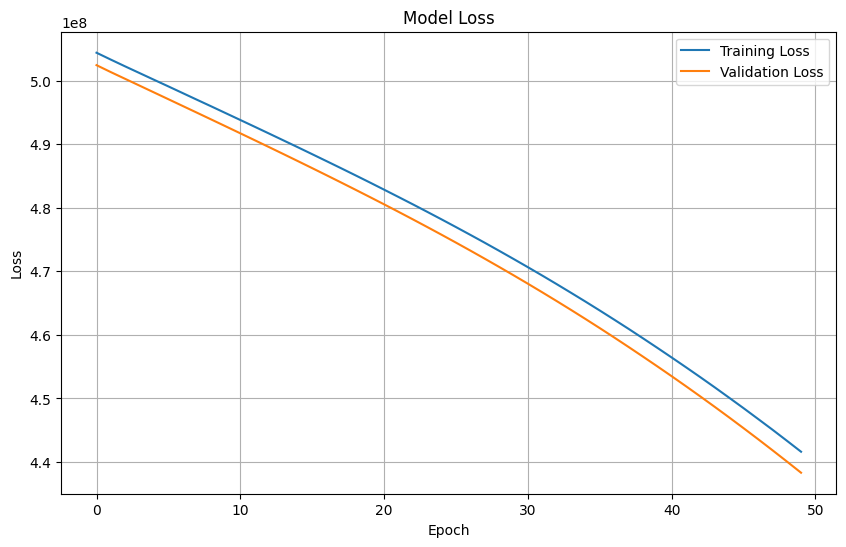

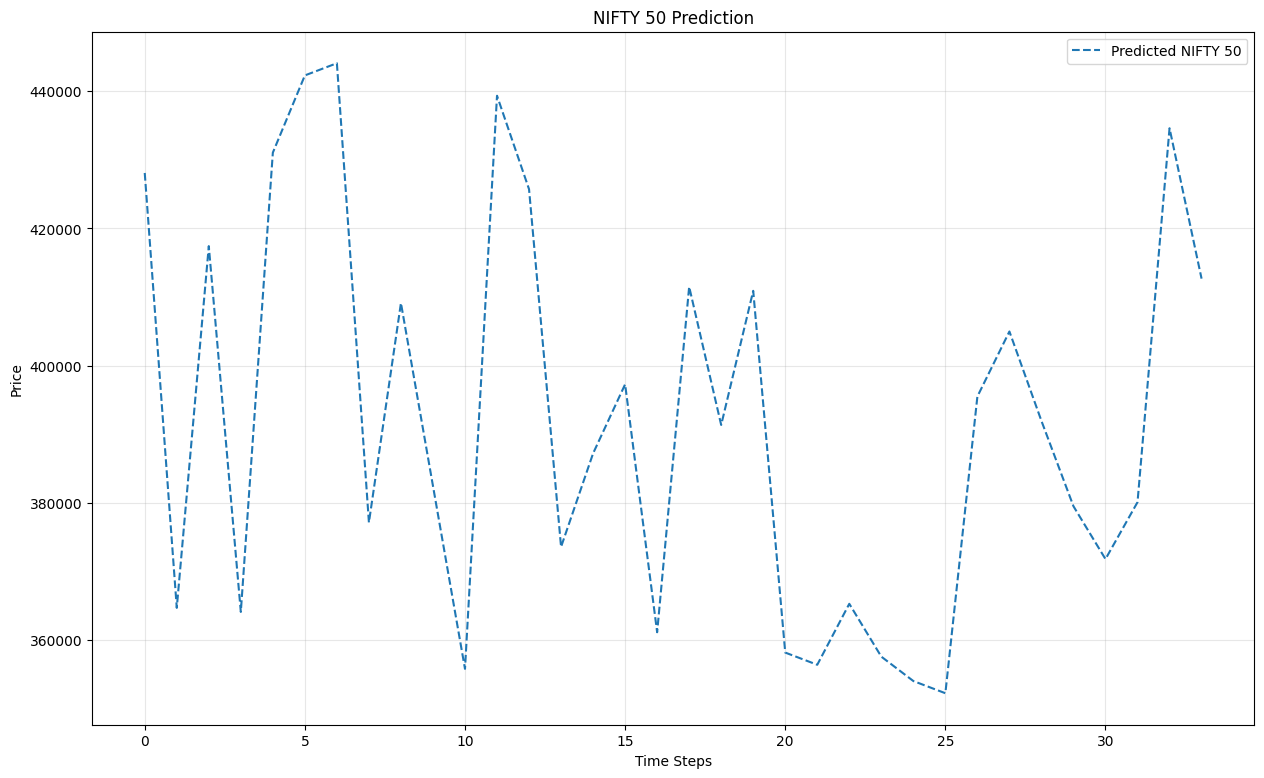

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.metrics import mean_squared_error

# First, clean the data
# Fill NaN values in NIFTY 50 with values from Pre Open NIFTY 50 where available
df['NIFTY 50'] = df['NIFTY 50'].fillna(df['Pre Open NIFTY 50'])
# Drop any remaining rows with NaN values
df = df.dropna(subset=['NIFTY 50'])

# Convert DateTime to datetime format if not already
df['DateTime'] = pd.to_datetime(df['DateTime'])
# Sort by DateTime
df = df.sort_values('DateTime')

# Create time features
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['time_value'] = df['hour'] * 60 + df['minute']  # Minutes since midnight

# Prepare data for sequence prediction
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Scale the data
scaler = MinMaxScaler()
nifty_scaled = scaler.fit_transform(df[['NIFTY 50']])

# Create sequences
seq_length = 5
X, y = create_sequences(nifty_scaled, seq_length)

# Reshape for RNN [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Build the model
model_nifty = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model_nifty.compile(optimizer='adam', loss='mse')

# Train the model
history_nifty = model_nifty.fit(X_train, y_train, epochs=50, validation_split=0.1, verbose=1)

# Evaluate the model
y_pred = model_nifty.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(history_nifty.history['loss'], label='Training Loss')
plt.plot(history_nifty.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(15, 9))

# Ensure 2D shape for inverse transform
y_pred_actual = scaler.inverse_transform(y_pred.reshape(-1, 1))


plt.plot(y_pred_actual, label='Predicted NIFTY 50', linestyle='--')
plt.title('NIFTY 50 Prediction')
plt.ylabel('Price')
plt.xlabel('Time Steps')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from sklearn.metrics import mean_squared_error

# Clean the data - combine Pre Open and NIFTY 50 values
df['Combined_NIFTY'] = df['NIFTY 50'].fillna(df['Pre Open NIFTY 50'])
df = df.dropna(subset=['Combined_NIFTY'])

# Convert DateTime to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime')

# Scale the data
scaler = MinMaxScaler()
nifty_scaled = scaler.fit_transform(df[['Combined_NIFTY']])

# Create sequences
seq_length = 5
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(nifty_scaled, seq_length)
X = X.reshape(X.shape[0], X.shape[1], 1)




# Simple RNN

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


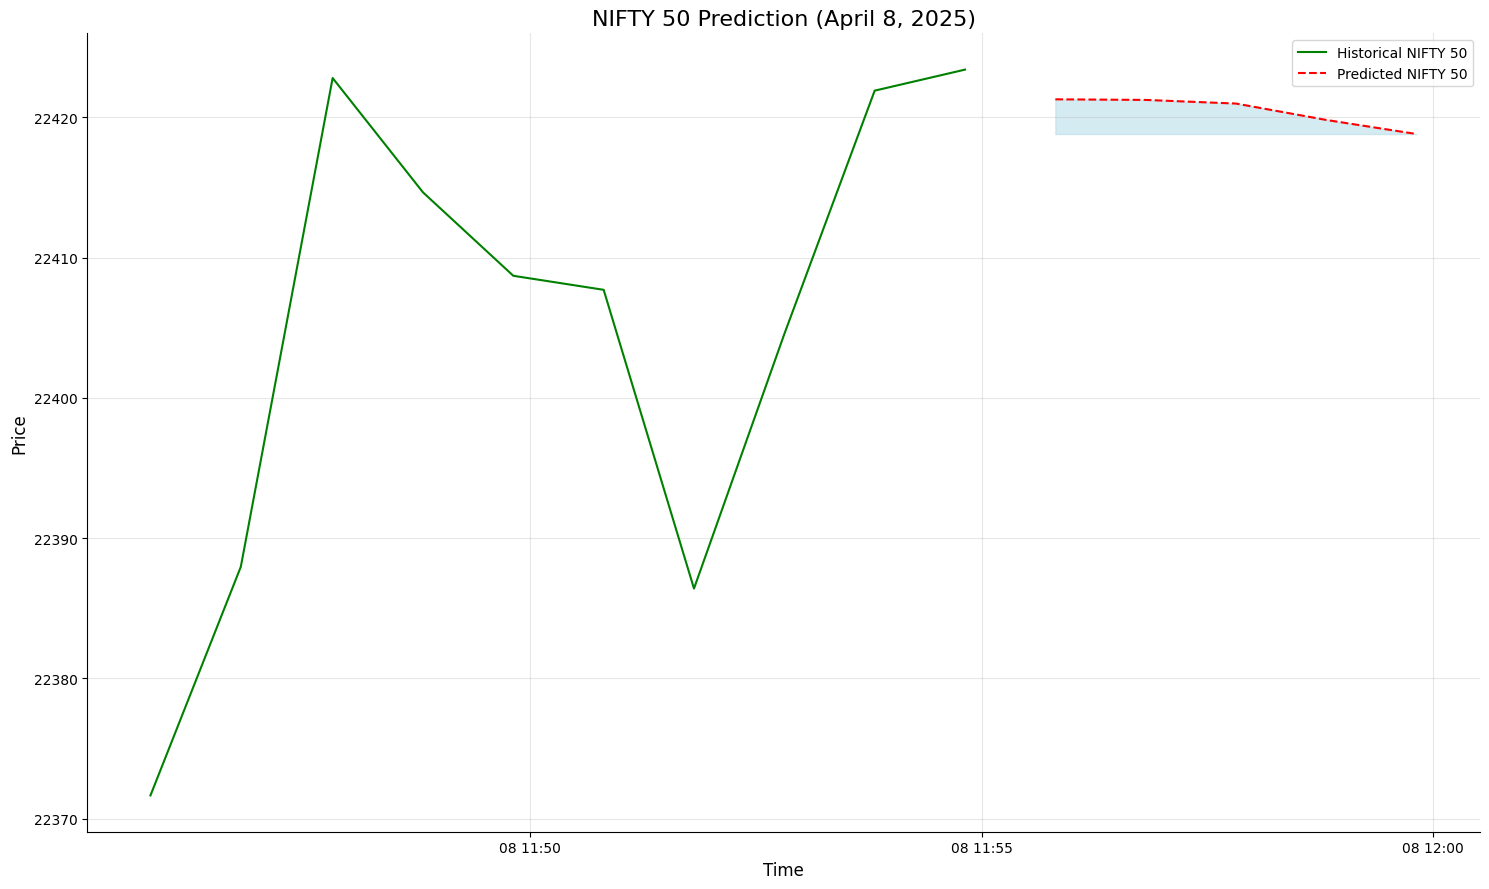

Predicted NIFTY 50 values for the next 5 minutes:
Time: 11:55:49 - Price: ₹22421.28
Time: 11:56:49 - Price: ₹22421.24
Time: 11:57:49 - Price: ₹22420.98
Time: 11:58:49 - Price: ₹22419.81
Time: 11:59:49 - Price: ₹22418.81


In [11]:
# Train the model on all available data
model_nifty = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model_nifty.compile(optimizer='adam', loss='mse')
history = model_nifty.fit(X, y, epochs=50, verbose=0)

# Generate predictions for next 5 steps (after 11:54:49 AM)
last_sequence = nifty_scaled[-seq_length:]
predicted_steps = []

for _ in range(5):
    # Reshape for prediction
    current_seq = last_sequence[-seq_length:].reshape(1, seq_length, 1)
    next_step = model_nifty.predict(current_seq, verbose=0)
    predicted_steps.append(next_step[0,0])
    # Update sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], next_step[0])

# Convert predictions back to original scale
predicted_array = np.array(predicted_steps).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_array)

# Create future timestamps (1-minute intervals after the last data point)
last_time = df['DateTime'].iloc[-1]
future_times = [last_time + pd.Timedelta(minutes=i+1) for i in range(5)]

# Plot the results
plt.figure(figsize=(15, 9))

# Plot historical data
plt.plot(df['DateTime'][-10:], df['Combined_NIFTY'][-10:], 'g-', label='Historical NIFTY 50')

# Plot predictions
plt.plot(future_times, predicted_prices, 'r--', label='Predicted NIFTY 50')
plt.fill_between(future_times, predicted_prices.flatten(), min(predicted_prices)[0],
                 color='lightblue', alpha=0.5)

plt.title('NIFTY 50 Prediction (April 8, 2025)', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Print the predicted values
print("Predicted NIFTY 50 values for the next 5 minutes:")
for i, (time, price) in enumerate(zip(future_times, predicted_prices)):
    print(f"Time: {time.strftime('%H:%M:%S')} - Price: ₹{price[0]:.2f}")

# Simple LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


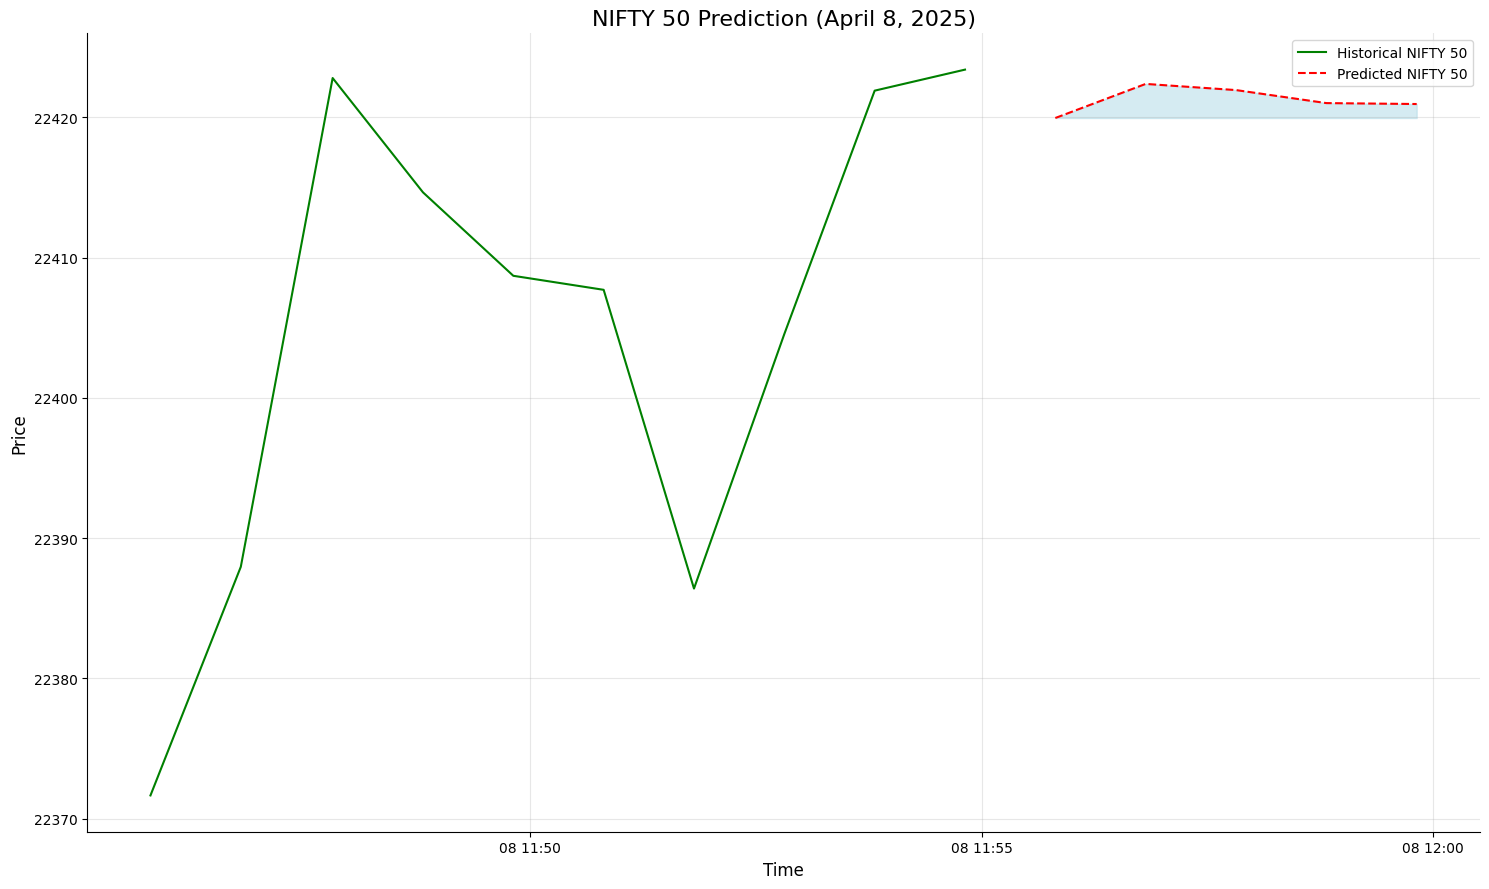

Predicted NIFTY 50 values for the next 5 minutes:
Time: 11:55:49 - Price: ₹22419.95
Time: 11:56:49 - Price: ₹22422.38
Time: 11:57:49 - Price: ₹22421.94
Time: 11:58:49 - Price: ₹22421.01
Time: 11:59:49 - Price: ₹22420.95


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is already loaded with the data from the image
df['Combined_NIFTY'] = df['NIFTY 50'].fillna(df['Pre Open NIFTY 50'])
df = df.dropna(subset=['Combined_NIFTY'])

df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime')

scaler = MinMaxScaler()
nifty_scaled = scaler.fit_transform(df[['Combined_NIFTY']])

seq_length = 5
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(nifty_scaled, seq_length)
X = X.reshape(X.shape[0], X.shape[1], 1)

model_nifty = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

model_nifty.compile(optimizer='adam', loss='mse')

history = model_nifty.fit(X, y, epochs=100, verbose=0)

last_sequence = nifty_scaled[-seq_length:]
predicted_steps = []

for _ in range(5):
    current_seq = last_sequence[-seq_length:].reshape(1, seq_length, 1)
    next_step = model_nifty.predict(current_seq, verbose=0)
    predicted_steps.append(next_step[0,0])
    last_sequence = np.append(last_sequence[1:], next_step[0])

predicted_array = np.array(predicted_steps).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_array)

last_time = df['DateTime'].iloc[-1]
future_times = [last_time + pd.Timedelta(minutes=i+1) for i in range(5)]

plt.figure(figsize=(15, 9))
plt.plot(df['DateTime'][-10:], df['Combined_NIFTY'][-10:], 'g-', label='Historical NIFTY 50')
plt.plot(future_times, predicted_prices, 'r--', label='Predicted NIFTY 50')
plt.fill_between(future_times, predicted_prices.flatten(), min(predicted_prices)[0],
                 color='lightblue', alpha=0.5)

plt.title('NIFTY 50 Prediction (April 8, 2025)', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

print("Predicted NIFTY 50 values for the next 5 minutes:")
for i, (time, price) in enumerate(zip(future_times, predicted_prices)):
    print(f"Time: {time.strftime('%H:%M:%S')} - Price: ₹{price[0]:.2f}")


# Multi Layer LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


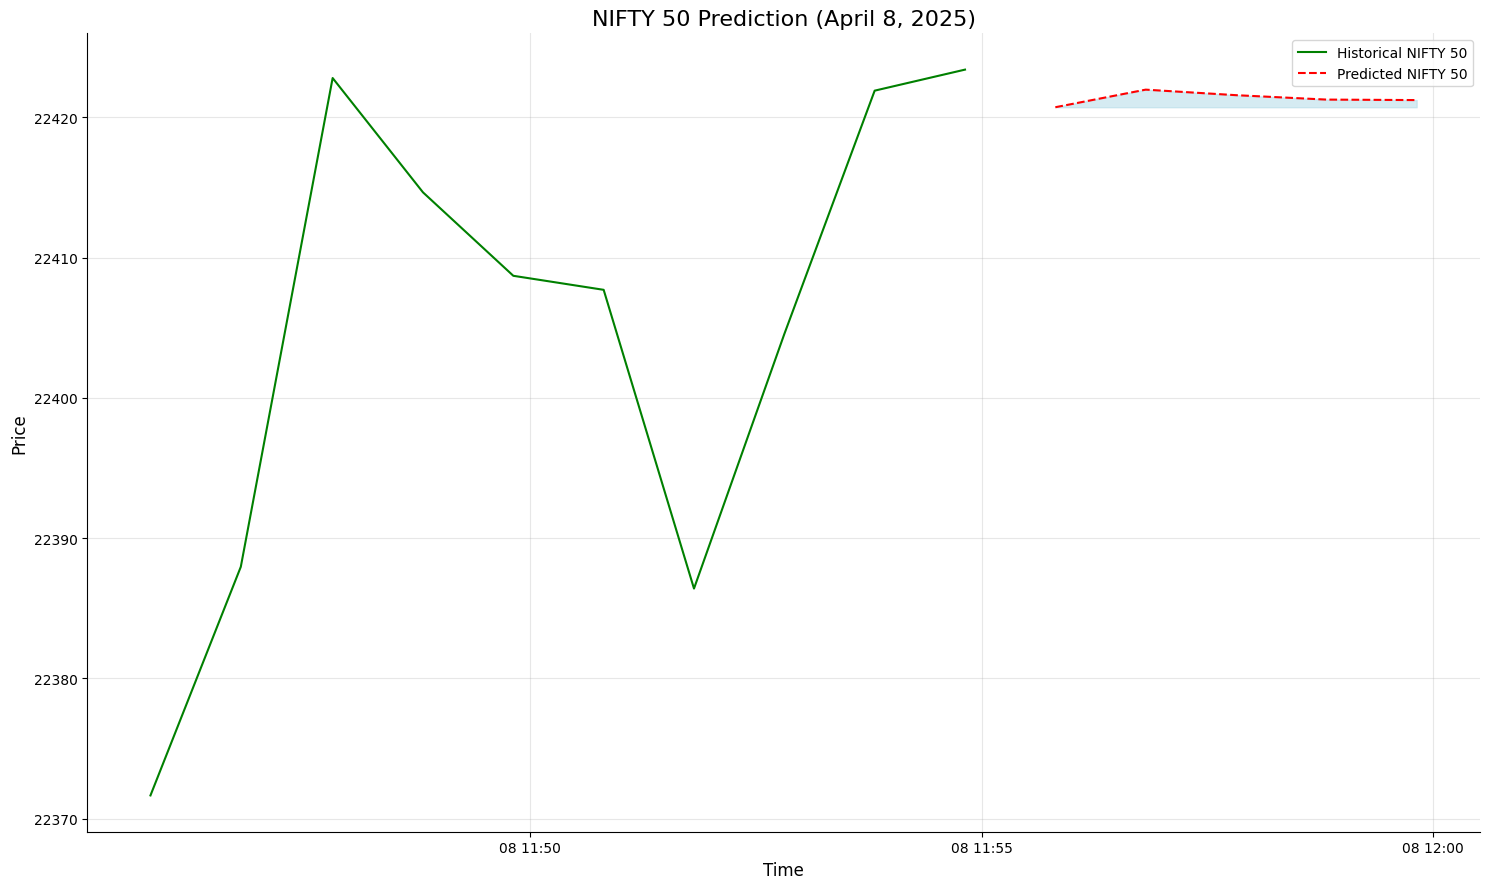

Predicted NIFTY 50 values for the next 5 minutes:
Time: 11:55:49 - Price: ₹22420.72
Time: 11:56:49 - Price: ₹22421.97
Time: 11:57:49 - Price: ₹22421.58
Time: 11:58:49 - Price: ₹22421.26
Time: 11:59:49 - Price: ₹22421.23


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming df is already loaded with the data
df['Combined_NIFTY'] = df['NIFTY 50'].fillna(df['Pre Open NIFTY 50'])
df = df.dropna(subset=['Combined_NIFTY'])

df['DateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('DateTime')

scaler = MinMaxScaler()
nifty_scaled = scaler.fit_transform(df[['Combined_NIFTY']])

# Sequence creation
n_steps = 5
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

X, y = create_sequences(nifty_scaled, n_steps)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Ensure proper shape for LSTM

# Modified model with 2 LSTM layers
lstm_model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)),
    LSTM(25, activation='relu'),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')

# Train the model
history = lstm_model.fit(X, y, epochs=100, verbose=0)

# Predict next 5 time steps
last_sequence = nifty_scaled[-n_steps:]
predicted_steps = []

for _ in range(5):
    current_seq = last_sequence[-n_steps:].reshape(1, n_steps, 1)
    next_step = lstm_model.predict(current_seq, verbose=0)
    predicted_steps.append(next_step[0, 0])
    last_sequence = np.append(last_sequence[1:], next_step[0])

# Inverse transform and create timestamps
predicted_array = np.array(predicted_steps).reshape(-1, 1)
predicted_prices = scaler.inverse_transform(predicted_array)

last_time = df['DateTime'].iloc[-1]
future_times = [last_time + pd.Timedelta(minutes=i+1) for i in range(5)]

# Plotting
plt.figure(figsize=(15, 9))
plt.plot(df['DateTime'][-10:], df['Combined_NIFTY'][-10:], 'g-', label='Historical NIFTY 50')
plt.plot(future_times, predicted_prices, 'r--', label='Predicted NIFTY 50')
plt.fill_between(future_times, predicted_prices.flatten(), min(predicted_prices)[0],
                 color='lightblue', alpha=0.5)

plt.title('NIFTY 50 Prediction (April 8, 2025)', fontsize=16)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

# Output predicted prices
print("Predicted NIFTY 50 values for the next 5 minutes:")
for time, price in zip(future_times, predicted_prices):
    print(f"Time: {time.strftime('%H:%M:%S')} - Price: ₹{price[0]:.2f}")


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, cohen_kappa_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for RNN input
x_train = x_train.reshape((x_train.shape[0], 28, 28))
x_test = x_test.reshape((x_test.shape[0], 28, 28))

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Train and Evaluate LSTM Model

In [15]:
# Define LSTM model
lstm_model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(28, 28)),
    Dropout(0.2),
    LSTM(64, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile model
lstm_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
lstm_model.summary()

# Train model
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)



# Evaluate on test data
lstm_loss, lstm_acc = lstm_model.evaluate(x_test, y_test)
print(f'LSTM Test Accuracy: {lstm_acc:.4f}')

# Predictions
lstm_predictions = lstm_model.predict(x_test)
lstm_pred_classes = np.argmax(lstm_predictions, axis=1)
actual = np.argmax(y_test, axis=1)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 28, 128)        │        80,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 28, 64)         │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 142,538 (556.79 KB)

 Trainable params: 142,538 (556.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6019 - loss: 1.2106 - val_accuracy: 0.9332 - val_loss: 0.2324
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9372 - loss: 0.2300 - val_accuracy: 0.9582 - val_loss: 0.1522
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9625 - loss: 0.1420 - val_accuracy: 0.9677 - val_loss: 0.1129
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9698 - loss: 0.1102 - val_accuracy: 0.9772 - val_loss: 0.0789
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9758 - loss: 0.0882 - val_accuracy: 0.9766 - val_loss: 0.0834
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9798 - loss: 0.0727 - val_accuracy: 0.9776 - val_loss: 0.0756
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9836 - loss: 0.0596 - val_accuracy: 0.9833 - val_loss: 0.0581
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9847 - loss: 0.0553 - val_accu

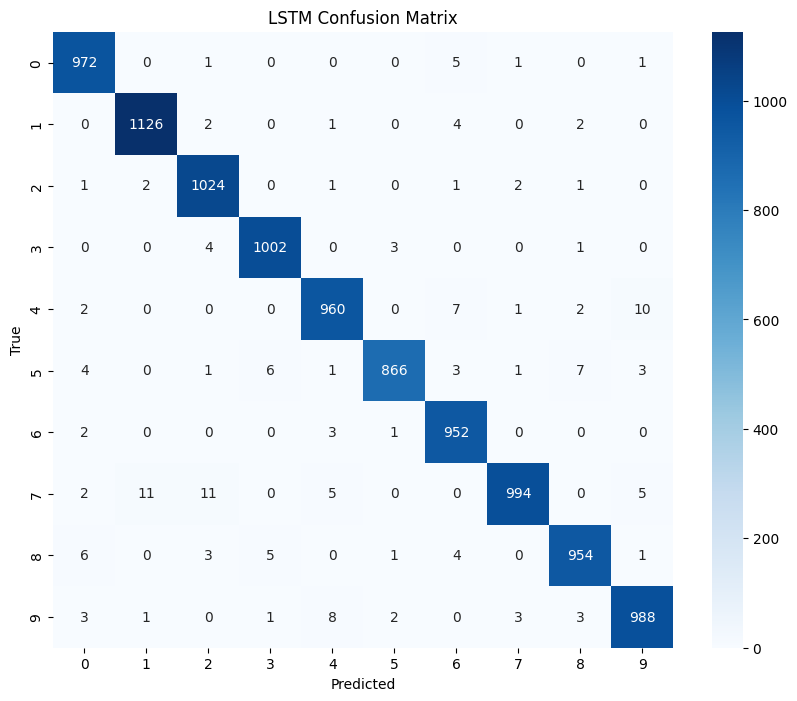

LSTM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.97      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

LSTM Cohen's Kappa: 0.9819926606086272


In [16]:
# Confusion Matrix
cm = confusion_matrix(actual, lstm_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('LSTM Confusion Matrix')
plt.show()

# Classification Report
print("LSTM Classification Report:")
print(classification_report(actual, lstm_pred_classes))

# Cohen's Kappa
print("LSTM Cohen's Kappa:", cohen_kappa_score(actual, lstm_pred_classes))


# Train and Evaluate GRU Model

In [17]:
# Define GRU model
gru_model = Sequential([
    GRU(128, return_sequences=True, input_shape=(28, 28)),
    Dropout(0.2),
    GRU(64, return_sequences=True),
    Dropout(0.2),
    GRU(32),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile model
gru_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
gru_model.summary()

# Train model
gru_history = gru_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Evaluate on test data
gru_loss, gru_acc = gru_model.evaluate(x_test, y_test)
print(f'GRU Test Accuracy: {gru_acc:.4f}')

# Predictions
gru_predictions = gru_model.predict(x_test)
gru_pred_classes = np.argmax(gru_predictions, axis=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 28, 128)        │        60,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 28, 64)         │        37,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 32)             │         9,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 107,658 (420.54 KB)

 Trainable params: 107,658 (420.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.5909 - loss: 1.2028 - val_accuracy: 0.9358 - val_loss: 0.2212
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9400 - loss: 0.2156 - val_accuracy: 0.9677 - val_loss: 0.1092
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9625 - loss: 0.1334 - val_accuracy: 0.9704 - val_loss: 0.0931
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.9735 - loss: 0.0959 - val_accuracy: 0.9769 - val_loss: 0.0746
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9781 - loss: 0.0767 - val_accuracy: 0.9836 - val_loss: 0.0559
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9848 - loss: 0.0573 - val_accuracy: 0.9791 - val_loss: 0.0726
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9844 - loss: 0.0548 - val_accuracy: 0.9839 - val_loss: 0.0543
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9880 - loss: 0.0417 - val_accu

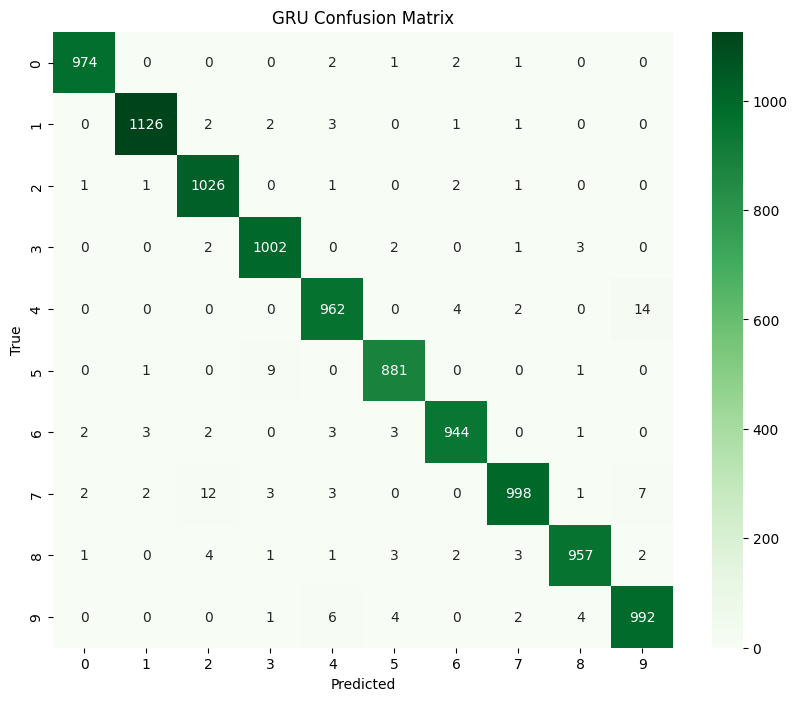

GRU Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

GRU Cohen's Kappa: 0.9846607020658833


In [18]:
# Confusion Matrix
cm = confusion_matrix(actual, gru_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('GRU Confusion Matrix')
plt.show()

# Classification Report
print("GRU Classification Report:")
print(classification_report(actual, gru_pred_classes))

# Cohen's Kappa
print("GRU Cohen's Kappa:", cohen_kappa_score(actual, gru_pred_classes))
